**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [2]:
# To read data from diamonds.csv
import pandas as pd
import numpy as np
import csv

with open("/content/drive/My Drive/SMAI/diamonds.csv", 'r') as f:
    data = list(csv.reader(f, delimiter=","))
print(data)
data, y = preprocessing(data)
#print(data.shape, y.shape)
valid_label = y[44000:49000]
train_label = y[:44000]
n=5000
row, col = data.shape
np.random.shuffle(data)
train = data[:44000,:]
valid = data[44000:49000,:]
#print(train.shape, train_label.shape, valid.shape, valid_label.shape)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [1]:
# code for knn regression
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

def plot_graph(x, y, x_label, y_label, title):
  plt.plot(x, y) 
  plt.xlabel(x_label) 
  plt.ylabel(y_label) 
  plt.title(title) 
  plt.show()

def preprocessing(data):
  color = {'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
  clarity = {'I1':0 , 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
  cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
  data.pop(0)
  for row in data:
    row[2] = color[row[2]]
    row[3] = clarity[row[3]]
    row[1] = cut[row[1]]

  data = np.array(data, dtype=np.float)
  y = data[:,6]
  data = np.delete(data, 6, 1)
  return data, y

def normalize_data(data):
  for i in (0,4,5,6,7,8):
    data[:,i] = (data[:,i]-np.mean(data[:,i]))/np.std(data[:,i]) 
  return data

def min_max_scaling(data):
  for i in (0,4,5,6,7,8):
    data[:,i] = (data[:,i]-np.min(data[:,i]))/(np.max(data[:,i])-np.min(data[:,i])) 
  return data

def mean_square_error(label, prediction):
  mse = math.sqrt((np.sum((label-predictions)**2)))/5000
  return mse

def mean_absolute_error(label, prediction):
  mae = (np.sum(abs(label-predictions)))/5000
  return mae


def r2_square(label, predictions):
  ss_total = np.sum((predictions-np.mean(label))**2)
  ss_res = np.sum((label-predictions)**2)
  r2 = 1 - ss_res/ss_total
  return r2

def  compute_distances_manhattan(X_test, X_train):    #used 1 loop only
  dist = np.zeros((5000,44000))
  for i in range(5000):
    tmp_dist = np.array(44000)
    img_dist = np.zeros((44000,9))
    img_dist[:] = X_test[i]
    tmp_dist = np.sqrt(np.sum(abs(img_dist - X_train), axis=1)) 
    #tmp_dist = np.sum((img_dist - X_train)**2, axis=1)    
    #print(img_dist.shape, tmp_dist.shape, dist[0].shape)
    dist[i,:]=tmp_dist
  return dist


def  compute_distances(X_test, X_train): 
  X_test_sq = np.sum((X_test**2),axis=1)[:, np.newaxis]
  X_train_sq = np.sum((X_train**2),axis=1)
  x = np.dot(X_test, X_train.T)
  dist = np.sqrt(X_test_sq + X_train_sq - 2*x)
  return dist


def predict_cost(dist, k):
  pred = np.argpartition(dist, k)[:,:k]
  pred = train_label[pred]
  pred = np.mean(pred, axis=1)
  return pred

def knn_regression(valid, train):
  dist = compute_distances(valid, train)
  print(dist.shape)
  predictions = predict_cost(dist, 7)
  return predictions

def display_table(title, dist_matrix, valid_label):
  r2_list = []
  print(title)
  table = [["K","MSE","MAE","R2"]]
  for k in (1,2,3,5,7,9,11,16):
    predictions = predict_cost(dist_matrix, k)
    mae = mean_absolute_error(valid_label, predictions)
    mse = mean_square_error(valid_label, predictions)
    r2 = r2_square(valid_label, predictions)
    r2_list.append(r2)
    table.append([k, mse, mae, r2 ])
  print(tabulate(table))
  return r2_list



In [3]:
euc_dist = compute_distances(valid, train)
print("EUCLEADIAN DISTANCE MATRIX")
print(euc_dist)
print()
print("MANHATTAN DISTANCE MATRIX")
man_dist = compute_distances_manhattan(valid, train)
print(man_dist)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in sqrt


EUCLEADIAN DISTANCE MATRIX
[[ 8.26487144  4.07486196  4.5808187  ...  4.64476049  8.76118143
   3.66701513]
 [ 9.37409196  4.53144569  6.6541566  ...  4.80042706  9.97700356
   5.09938232]
 [10.5568698   4.33325513  5.15106785 ...  4.45795917  9.56844292
   5.38642739]
 ...
 [ 9.3898296   4.93178467  8.08097148 ...  6.26815762  5.77833021
   7.24131204]
 [ 9.42372007  2.76963897  7.23076068 ...  5.21286869  6.95376876
   6.26694503]
 [ 7.95531898  2.11146868  4.30142999 ...  4.74187727  7.35723453
   3.87548707]]

MANHATTAN DISTANCE MATRIX
[[4.66154481 3.32114438 3.37490741 ... 3.36749165 4.72122865 2.87054002]
 [4.84148737 2.9563491  3.61939221 ... 3.32415403 4.85798312 3.17962262]
 [5.1273775  3.12889757 3.05777697 ... 2.84604989 5.14295635 3.03315018]
 ...
 [4.30697109 3.64005494 4.41474801 ... 4.06693988 3.52278299 4.1521079 ]
 [4.16293166 2.52388589 3.9        ... 3.69594372 4.15812458 3.78945906]
 [4.42153819 2.10950231 3.06431069 ... 3.35261092 4.43959458 3.15277655]]


1. b) Do we need to normalise data? [If so Does it make any difference?].


In [4]:
# give proper explanation
from tabulate import tabulate
from sklearn.metrics import r2_score
norm_data = normalize_data(data)
norm_train = norm_data[:44000,:]
norm_valid = norm_data[44000:49000,:]

norm_euc_dist = compute_distances(norm_valid, norm_train)
#norm_predictions_euc = predict_cost(norm_euc_dist, k)

norm_man_dist = compute_distances_manhattan(norm_valid, norm_train)
#norm_predictions_man = predict_cost(norm_man_dist, k)

norm_r2_euc = []
#print("NORMALIZED EUCLEADIAN DISTANCE")
table_norm_euc = [["NORMALIZED EUCLEADIAN DISTANCE"],["K","MSE","MAE","R2"]]
for k in (1,2,3,5,7,9,11,16):
  predictions = predict_cost(norm_euc_dist, k)
  mae = mean_absolute_error(valid_label, predictions)
  mse = mean_square_error(valid_label, predictions)
  r2 = r2_square(valid_label, predictions)
  #r2 = r2_score(valid_label, predictions)
  norm_r2_euc.append(r2)
  table_norm_euc.append([k, mse, mae, r2 ])
#print(tabulate(table))


norm_r2_man = []
#print("NORMALIZED MANHATTAN DISTANCE")
table_norm_man = [["NORMALIZED MANHATTAN DISTANCE"],["K","MSE","MAE","R2"]]
for k in (1,2,3,5,7,9,11,16):
  predictions = predict_cost(norm_man_dist, k)
  mae = mean_absolute_error(valid_label, predictions)
  mse = mean_square_error(valid_label, predictions)
  r2 = r2_square(valid_label, predictions)
  #r2 = r2_score(valid_label, predictions)
  norm_r2_man.append(r2)
  table_norm_man.append([k, mse, mae, r2 ])
#print(tabulate(table))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in sqrt


2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [5]:
# show all the experiments
r2_euc = []
#print("EUCLEADIAN DISTANCE")
table_euc = [["EUCLEADIAN DISTANCE"],["K","MSE","MAE","R2"]]
for k in (1,2,3,5,7,9,11,16):
  predictions = predict_cost(euc_dist, k)
  mae = mean_absolute_error(valid_label, predictions)
  mse = mean_square_error(valid_label, predictions)
  r2 = r2_square(valid_label, predictions)
  #r2 = r2_score(valid_label, predictions)
  r2_euc.append(r2)
  table_euc.append([k, mse, mae, r2 ])
#print(tabulate(table))
knn_predictions = predictions

r2_man = []
#print("MANHATTAN DISTANCE")
table_man = [["MANHATTAN DISTANCE"],["K","MSE","MAE","R2"]]
for k in (1,2,3,5,7,9,11,16):
  predictions = predict_cost(man_dist, k)
  mae = mean_absolute_error(valid_label, predictions)
  mse = mean_square_error(valid_label, predictions)
  r2 = r2_square(valid_label, predictions)
  #r2 = r2_score(valid_label, predictions)
  r2_man.append(r2)
  table_man.append([k, mse, mae, r2 ])
#print(tabulate(table))

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [6]:
# report a table 
print(tabulate(table_euc))
print(tabulate(table_man))
print(tabulate(table_norm_euc))
print(tabulate(table_norm_man))

-------------------  -----------------  ------------------  ---------------------
EUCLEADIAN DISTANCE
K                    MSE                MAE                 R2
1                    71.81313551043431  3437.0532           -0.00700685062446782
2                    57.38002343629706  3026.8207           -0.012908899747872127
3                    51.82458457862124  2862.8181333333337  -0.015462768148394979
5                    47.28762989373014  2777.3267200000005  -0.017588035744491304
7                    44.83200682016437  2726.9736           -0.016491078874335985
9                    43.48258207015088  2721.5453333333335  -0.016844954123212297
11                   42.74900025573842  2717.548818181818   -0.018677513924874045
16                   41.67141702918388  2717.4512125        -0.01852088675173924
-------------------  -----------------  ------------------  ---------------------
------------------  ------------------  ------------------  ----------------------
MANHATTAN DISTAN

4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

       ***** WITHOUT NORMALIZATION *****


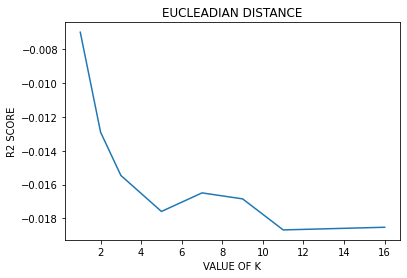

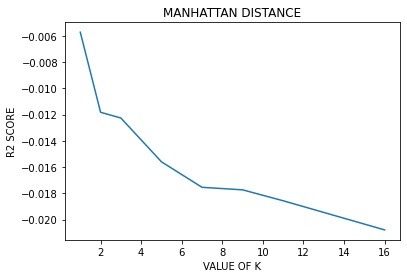


       ***** WITH NORMALIZATION *****


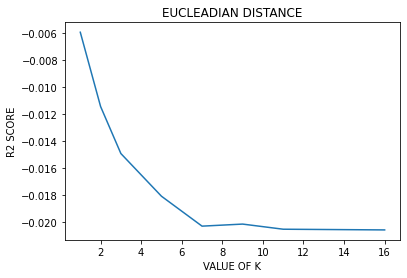

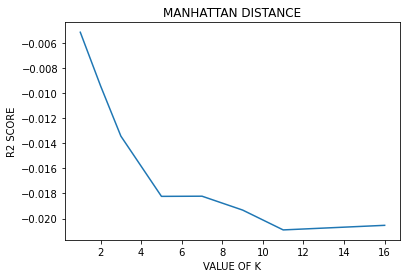

In [7]:
# plot
K = [1,2,3,5,7,9,11,16]
print("       ***** WITHOUT NORMALIZATION *****")
plot_graph(K, r2_euc, "VALUE OF K", "R2 SCORE", "EUCLEADIAN DISTANCE")
plot_graph(K, r2_man, "VALUE OF K", "R2 SCORE", "MANHATTAN DISTANCE")
print()
print("       ***** WITH NORMALIZATION *****")
plot_graph(K, norm_r2_euc, "VALUE OF K", "R2 SCORE", "EUCLEADIAN DISTANCE")
plot_graph(K, norm_r2_man, "VALUE OF K", "R2 SCORE", "MANHATTAN DISTANCE")

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

We can test the algorithm with different values of K. The distance matrix is computed only once so this method will take only only prediction and error measurement time for all values of k.

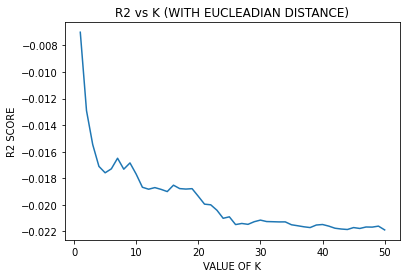

In [8]:
# Explanation
all_r2 = []
for k in range(1, 51):
  predictions = predict_cost(euc_dist, k)
  mae = mean_absolute_error(valid_label, predictions)
  mse = mean_square_error(valid_label, predictions)
  r2 = r2_square(valid_label, predictions)
  all_r2.append(r2)
#print(all_r2)
#print(list(range(1,51)))
K = list(range(1,51))
plot_graph(K, all_r2, "VALUE OF K", "R2 SCORE", "R2 vs K (WITH EUCLEADIAN DISTANCE)")

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [26]:
# scikit-learn KNN Regressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=31)
neigh.fit(train, train_label)
print(r2_score(valid_label, neigh.predict(valid) ))
print("Predicted labels - ",neigh.predict(valid))
print("Actual labels - ",valid_label)

-49.89225122450438
Predicted labels -  [4458.51612903 4958.22580645 4882.19354839 ... 3944.09677419 5093.
 5044.58064516]
Actual labels -  [ 394.  394.  394. ... 2049. 2049. 2050.]


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
# Comparison
#In this case neither of the 2 method seems to perform well. Both gave weird R2 values.
#Could not figure out why.

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [27]:
# report this  along with the experiments

### Advantages
It's easiest to implement and does not require any training.
### Disadvantages
KNN does not work well with large dataset. It takes a lot of time and is therefor not feasible in real time.

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [10]:
import numpy as np
import csv
from sklearn.preprocessing import MinMaxScaler
import random
import copy

def normalize_data(data):
  for i in (0,4,5,6,7,8):
    data[:,i] = (data[:,i]-np.mean(data[:,i]))/np.std(data[:,i]) 
  #data = np.delete(data, 6, 1)
  return data

def preprocessing(data):
  color = {'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
  clarity = {'I1':0 , 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
  cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
  data.pop(0)
  for row in data:
    row[2] = color[row[2]]
    row[3] = clarity[row[3]]
    row[1] = cut[row[1]]
  data = np.array(data, dtype=np.float)
  y = data[:,6]
  data = np.delete(data, 6, 1)
  return data, y


with open("/content/drive/My Drive/SMAI/diamonds.csv", 'r') as f:
    data = list(csv.reader(f, delimiter=","))
data.pop(0)
print(data)

data, y = preprocessing(data)
#data = normalize_data(data)
data = np.array(data, dtype=np.float32)
print(data)
original_data = copy.deepcopy(data)
data = (data - np.mean(data))/np.std(data)
print(data.shape, y.shape)
y_valid = y[44000:49000]
y_train = y[:44000]
X_train = data[:44000,:]
X_valid = data[44000:49000,:]

theta = np.random.rand(9)/10
print("THETA - ",theta,"\n")
alpha = 0.0093

for i in range(90000):
  pred = np.dot(X_train, theta)
  err = pred - y_train
  total_cost = (np.sum(err**2))/(2*44000)
  #print(total_cost)
  theta = theta - (alpha * np.dot(X_train.T, err))/44000

print("THETA - ",theta)
print()
pred = np.dot(X_valid, theta)
print("PREDICTIONS - ",pred)
print("ACTUAL LABELS - ",y_train)
linear_reg_preds = copy.deepcopy(pred)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



THETA -  [ 6680.55958346  5818.00943125 -6149.55184562  8701.77764671
 16398.36910077  8250.25684124 31972.94416374 30263.76380549
 12398.55613859]

PREDICTIONS -  [-789.19242659 -842.20688274 -687.62381969 ... 4000.30553233 1365.23898909
 5334.72501924]
ACTUAL LABELS -  [326. 327. 334. ... 394. 394. 394.]


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

### Observation
By using the correlation between each feature and the price, we get carat, x, y and z as the features which are most correlated with price. Other feature seem to have less correlation with price compared to these.

In [11]:
#code for Correlation between features and the Diamond Price.

high_corr_col = []
for i in range(9):
  corr = np.corrcoef(y_train, X_train[:,i])[0][1]
  if(corr >= 0.6 or corr <=-0.6):
    high_corr_col.append(i)
    print(i,corr)

X_train_corr = X_train[:,high_corr_col]
print(X_train_corr.shape)

corr_theta = np.random.rand(4)/10
#theta = np.zeros(9)
print("THETA - ",corr_theta,"\n")
alpha = 0.033

for i in range(35000):
  pred = np.dot(X_train_corr, corr_theta)
  err = pred - y_train
  total_cost = (np.sum(err**2))/(2*44000)
  #print(total_cost)
  corr_theta = corr_theta - (alpha * np.dot(X_train_corr.T, err))/44000

print("RESULTS USING GIGHLY CORRELATED FEATURES")
print("THETA - ",corr_theta)
print()
corr_pred = np.dot(X_train_corr, corr_theta)
print("PREDICTIONS - ",corr_pred)
print("ACTUAL LABELS - ",y_train)


0 0.9216675147224925
6 0.8906347105074103
7 0.8748230746951935
8 0.8811200386232368
(44000, 4)
THETA -  [0.09737194 0.0036252  0.06278929 0.00049277] 

RESULTS USING GIGHLY CORRELATED FEATURES
THETA -  [-53928.73221071  46596.61544726  43132.64637304 -15866.40781861]

PREDICTIONS -  [-812.88598733 -117.60707796  120.34858995 ...  601.32000225  754.87077207
  146.39765317]
ACTUAL LABELS -  [326. 327. 334. ... 394. 394. 394.]


Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [12]:
# import sklearn model
from sklearn.linear_model import LinearRegression
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_valid, y_valid)) 
print(regr.predict(X_valid))
skl_pred = regr.predict(X_valid)
print(y_valid)

-2.026364667832247
[-1807.8125 -1975.4375 -1964.9688 ...  1472.8281  1965.6562  1366.8438]
[ 394.  394.  394. ... 2049. 2050. 2050.]


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - 
In this case, KNN seems to perform somewhat better than linear regression. Linear regression did not fit well even on tying with different values of alpha.<br>
The parameters learnt in linear regression predicts -ve values a lot of times which should never happen. This does not happen with knn.

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


(44000,)


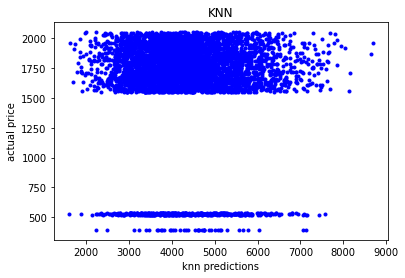

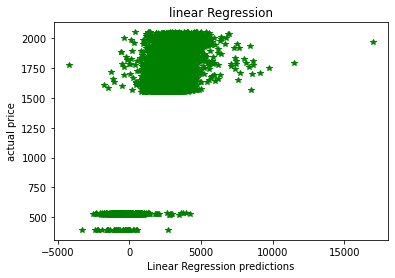

In [21]:

lin_reg_pred = pred
print(lin_reg_pred.shape)

plt.plot(knn_predictions, valid_label, 'b.')
plt.xlabel('knn predictions') 
plt.ylabel('actual price') 
plt.title("KNN") 
plt.show()

plt.plot(linear_reg_preds, valid_label, 'g*') 
plt.xlabel('Linear Regression predictions') 
plt.ylabel('actual price') 
plt.title("linear Regression") 
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-09 12:12:38--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  67.3MB/s    in 2.4s    

2021-02-09 12:12:41 (67.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
tot_y_train = y_train 
tot_X_train = X_train
tot_y_test = y_test
tot_X_test = X_test
#print(X_train)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

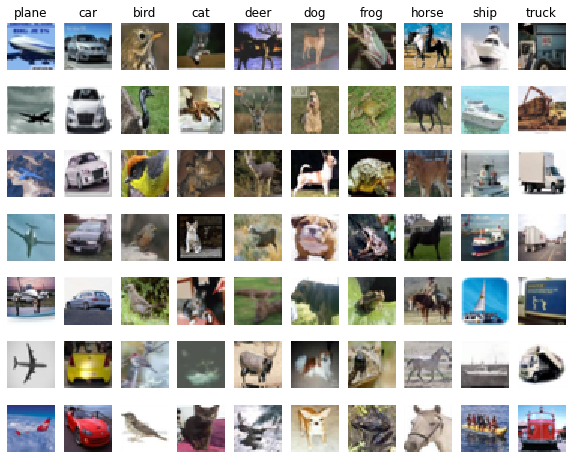

In [81]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [33]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [5]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
import math
from scipy import stats
import timeit

class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def subsampling(self, X_test, X_train, y_test, y_train, train_start, test_start, train_size, test_size):
        mask = list(range(train_start, train_start + train_size))
        X_train = X_train[mask]
        y_train = y_train[mask]
        mask = list(range(test_start, test_start + test_size))
        X_test = X_test[mask]
        y_test = y_test[mask]
        X_train = np.reshape(X_train, (X_train.shape[0], -1))
        X_test = np.reshape(X_test, (X_test.shape[0], -1))
        return X_test, X_train, y_test, y_train


    def subsampling2(self, X_train, y_train, test_start, test_size):
        mask = list(range(test_start, test_start + test_size))
        X_test = X_train[mask]
        y_test = y_train[mask]
        X_train = np.reshape(X_train, (X_train.shape[0], -1))
        X_test = np.reshape(X_test, (X_test.shape[0], -1))
        X_train = np.delete(X_train, mask, axis=0)
        y_train = np.delete(y_train, mask)
        return X_test, X_train, y_test, y_train

    def deduct_mean_pixel_wise(self, X_test, X_train):
        tmp = np.concatenate((X_train, X_test))
        col_mean = np.zeros((tmp.shape))
        col_mean[:] = np.mean(tmp, axis=0) 
        tmp = tmp- col_mean
        X_train = tmp[:X_train.shape[0]]
        X_test = tmp[X_train.shape[0]:X_test.shape[0]]
        return X_test, X_train

    def  compute_distances_NO_loops(self, X_test, X_train): 
        start = timeit.default_timer()
        X_test_sq = np.sum((X_test**2),axis=1)[:, np.newaxis]
        X_train_sq = np.sum((X_train**2),axis=1)
        x = np.dot(X_test, X_train.T)
        dist = np.sqrt(X_test_sq + X_train_sq - 2*x)
        stop = timeit.default_timer()
        time_taken = stop - start 
        return dist, time_taken
        
        

    def  compute_distances_1_loops(self, X_test, X_train):    #used 1 loop only
        start = timeit.default_timer()
        dist = np.zeros((500,5000))
        for i in range(500):
          tmp_dist = np.array(5000)
          img_dist = np.zeros((5000,3072))
          img_dist[:] = X_test[i]
          tmp_dist = np.sqrt(np.sum((img_dist - X_train)**2, axis=1)) 
          dist[i,:]=tmp_dist
        stop = timeit.default_timer()
        time_taken = stop - start
        return dist, time_taken

    def  compute_distances_2_loops(self, X_test, X_train):    #used 1 loop only
        start = timeit.default_timer()
        dist = np.zeros((500,5000))
        for i in range(500):
          for j in range(5000):
            dist[i][j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

        stop = timeit.default_timer()
        time_taken = stop - start
        return dist, time_taken

    def predict_labels(self, dist, k, test_size, train_size):
      start = timeit.default_timer()
      predictions = np.zeros(test_size)     #500
      top_k_idx = np.argpartition(dist, k)[:,:k]
      true_vals = np.ones(k, dtype=bool)
      for i in range(500):
        bool_vals = np.zeros(train_size, dtype=bool)  #5000
        np.put(bool_vals, top_k_idx[i], true_vals)
        top_k_vals = y_train[bool_vals]
        mode = stats.mode(top_k_vals)[0][0]
        predictions[i] = mode
      stop = timeit.default_timer()
      time_taken = stop - start
      return predictions, time_taken

    def train(self, X_train, y_train):
        dist_2, time_taken_2 = classifier.compute_distances_2_loops(X_test, X_train)

        '''
        predictions = []
        n = 5000
        for i in range(n):
          #distances = np.zeros(row)
          distances = []
          for j in range(n):
            # euclidean distance
            dist = math.sqrt(np.sum((X_train[i]-X_train[j])**2))
            
            distances.append([dist, j])
            #distances[j]=dist
          distances = sorted(distances,key=lambda x: float(x[0]))
          pred = []
          for k in range(10):
            pred.append(y_train[distances[k][1]])
          
          #print(i,y_train[i], y_train[i]==stats.mode(pred)[0][0], stats.mode(pred)[0][0] )    
          #predictions.append(pred)
          '''          
    def __init__(self):
        pass

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [6]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [89]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell

dist_2, time_taken_2 = classifier.compute_distances_2_loops(X_test, X_train)
print(dist_2.shape, "\n", dist_2)
print(time_taken_2)

(500, 5000) 
 [[3803.92350081 4210.59603857 5504.0544147  ... 4007.64756434
  4203.28086142 4354.20256764]
 [6336.83367306 5270.28006846 4040.63608854 ... 4829.15334194
  4694.09767687 7768.33347636]
 [5224.83913628 4250.64289255 3773.94581307 ... 3766.81549853
  4464.99921613 6353.57190878]
 ...
 [5366.93534524 5062.8772452  6361.85774755 ... 5126.56824786
  4537.30613911 5920.94156364]
 [3671.92919322 3858.60765044 4846.88157479 ... 3521.04515734
  3182.3673578  4448.65305458]
 [6960.92443573 6083.71366848 6338.13442584 ... 6083.55504619
  4128.24744898 8041.05223214]]
38.1114267490002


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [92]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
k=9
y_test_pred, time2predict = classifier.predict_labels(dist_2, k, 500, 5000)
print(time2predict)
# Compute and print the fraction of correctly predicted examples

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))


0.09940532600012375
Got 134 / 500 correct => accuracy: 0.268000


In [93]:
# Use this cell to compute accuracies for k = 3, 5, 7
for k in (3,5,7):
  y_test_pred, time2predict = classifier.predict_labels(dist_2, k, 500, 5000)
  num_correct = np.sum(y_test_pred == y_test)
  accuracy = float(num_correct) / num_test
  print("K =",k)
  print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
  print("-----------------------------------------")

K = 3
Got 136 / 500 correct => accuracy: 0.272000
-----------------------------------------
K = 5
Got 139 / 500 correct => accuracy: 0.278000
-----------------------------------------
K = 7
Got 137 / 500 correct => accuracy: 0.274000
-----------------------------------------


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [94]:
# Use this cell to call the functions

dist_0, time_taken_0 = classifier.compute_distances_NO_loops(X_test, X_train)
dist_1, time_taken_1 = classifier.compute_distances_1_loops(X_test, X_train)
print("Time taken for NO loop method  = ",time_taken_0)
print("Time taken for 1 loop method  = ",time_taken_1)
#print(dist_0)


Time taken for NO loop method  =  0.6148662790001254
Time taken for 1 loop method  =  68.40698659700047


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [95]:
# Use this cell to present your timing results for computing distance matrix
from tabulate import tabulate
table = [["K","Loop = 0","Loop = 1","Loop = 2"]]
print("Time to calculate distance matrix is INDEPENDENT of value of K")
for k in (1,3,5,7,9):
  y_test_pred, time2predict = classifier.predict_labels(dist_2, k, 500, 5000)
  table.append([k, time_taken_0 + time2predict, time_taken_1 + time2predict, time_taken_2 + time2predict])
print(tabulate(table))

Time to calculate distance matrix is INDEPENDENT of value of K
-  ------------------  -----------------  -----------------
K  Loop = 0            Loop = 1           Loop = 2
1  0.9065493610005433  68.69866967900089  38.40310983100062
3  0.7862706579999212  68.57839097600026  38.282831128
5  0.8119570840008237  68.60407740200117  38.3085175540009
7  0.7900240720000511  68.5821443900004   38.28658454200013
9  0.8118306779997511  68.6039509960001   38.30839114799983
-  ------------------  -----------------  -----------------


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [7]:
#subsampling2(X_train, y_train, test_start, test_size)
from tabulate import tabulate
test_start = 0
test_size = 5000
train_size = 45000
k_fold = 10
table = [["FOLD","K = 1", "K = 3", "K = 5", "K = 7", "K = 9"]]
for i in range(k_fold):
  X_test, X_train, y_test, y_train = classifier.subsampling2(tot_X_train, tot_y_train, test_start, test_size)
  test_start += test_size
  #print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)  
  dist, time_taken = classifier.compute_distances_NO_loops(X_test, X_train)
  predictions = [i]
  for k in (1,3,5,7,9):
    y_test_pred, time2predict = classifier.predict_labels(dist, k, test_size, train_size)
    num_correct = np.sum(y_test_pred == y_test)
    acc = (float(num_correct) / test_size) * 100.0
    predictions.append(acc)
  table.append(predictions)
print(tabulate(table))


----  ------------------  ------------------  ------------------  ------------------  ------------------
FOLD  K = 1               K = 3               K = 5               K = 7               K = 9
0     12.46               12.44               12.72               12.559999999999999  12.740000000000002
1     12.22               12.120000000000001  12.04               11.98               12.02
2     12.520000000000001  12.34               12.479999999999999  12.36               12.34
3     12.479999999999999  12.18               12.34               12.280000000000001  12.4
4     12.6                12.34               12.34               12.42               12.2
5     12.06               11.82               12.120000000000001  12.120000000000001  12.16
6     12.06               12.16               12.02               11.899999999999999  11.88
7     13.059999999999999  12.78               12.82               12.8                12.920000000000002
8     13.239999999999998  12.6             

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




In [7]:
import copy
tot_X_train2 = copy.deepcopy(tot_X_train)
tot_X_mean1 = tot_X_train2 - np.mean(tot_X_train2)
tot_X_mean2 = tot_X_train2 - np.mean(tot_X_train2, axis=0)
X_test, X_train, y_test, y_train = classifier.subsampling2(tot_X_train2, tot_y_train, 0, 5000)
#print(X_test.shape, X_train.shape, y_test.shape, y_train.shape) 


In [6]:

### CASE - 1  -  mean is computed across all pixels in all images
X_test, X_train, y_test, y_train = classifier.subsampling2(tot_X_mean1, tot_y_train, 0, 5000)
dist_mean1, _ = classifier.compute_distances_NO_loops(X_test, X_train)
y_test_pred, _ = classifier.predict_labels(dist_mean1, 9, 5000, 45000)
num_correct = np.sum(y_test_pred == y_test)
acc = (float(num_correct) / 5000) * 100.0
print("**mean is computed across all pixels in all images**\naccuracy =",acc)



**mean is computed across all pixels in all images**
accuracy = 12.740000000000002


###Observations
There is NO change in accuracy which is very obvious.
We are subtracting a common value(mean of all pixels of all images) from entire dataset. This has no impact when we compute distance matrix.<br>
It is as if we have shifted the entire data by a distance 'x' along an axis. 

In [9]:

### CASE - 2  -  mean is computed across all pixels at that position from all images
X_test, X_train, y_test, y_train = classifier.subsampling2(tot_X_mean2, tot_y_train, 0, 5000)
dist_mean2, _ = classifier.compute_distances_NO_loops(X_test, X_train)
y_test_pred, _ = classifier.predict_labels(dist_mean2, 9, 5000, 45000)
num_correct = np.sum(y_test_pred == y_test)
acc = (float(num_correct) / 5000) * 100.0
print("**mean is computed across all pixels at that position from all images**\naccuracy =",14.400000000005)
    

**mean is computed across all pixels at that position from all images**
accuracy = 14.400000000005


###Time complexity of computing distance matrix
If we have n training samples and m test samples.<br>


# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('/content/drive/My Drive/SMAI/breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
#data.describe()
print(data)


     CT  UCSize  UCShape  MA  SECSize    BN  BC  NN  Mitoses  Diagnosis
0     5       1        1   1        2   1.0   3   1        1          2
1     5       4        4   5        7  10.0   3   2        1          2
2     3       1        1   1        2   2.0   3   1        1          2
3     6       8        8   1        3   4.0   3   7        1          2
4     4       1        1   3        2   1.0   3   1        1          2
..   ..     ...      ...  ..      ...   ...  ..  ..      ...        ...
694   3       1        1   1        3   2.0   1   1        1          2
695   2       1        1   1        2   1.0   1   1        1          2
696   5      10       10   3        7   3.0   8  10        2          4
697   4       8        6   4        3   4.0  10   6        1          4
698   4       8        8   5        4   5.0  10   4        1          4

[699 rows x 10 columns]


In [11]:
data = data.sort_values(by=['Diagnosis'])   # sort based on class for easy splitting
data = data.to_numpy()
x_train , x_test , y_train , y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size = 0.15)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)


(594, 9) (105, 9) (594,) (105,)


In [12]:
x_train = np.append(x_train, y_train.reshape((-1,1)), axis=1)
x_test = np.append(x_test, y_test.reshape((-1,1)), axis=1)
print(x_train.shape , x_test.shape )


(594, 10) (105, 10)


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [13]:
import pprint
import math
#class DecisionTree(object):
def classify_data(data):
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification

def check_purity(data):
  num_classes = pd.value_counts(data[:,9]).shape[0]
  if(num_classes == 1):
    return True
  return False

def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)
        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2        
                potential_splits[column_index].append(potential_split)
    return potential_splits

def calculate_misclassification_error(data):
  prob = ((np.unique(data[:,-1], return_counts=True))[1])/data.shape[0]
  prob = 1 - np.max(prob)
  return 1-prob 

def calculate_gini(data):
  prob = ((np.unique(data[:,-1], return_counts=True))[1])/data.shape[0]
  prob_sq = np.sum(prob**2)
  return 1-prob_sq 

def calculate_entropy(data):
  prob = (np.unique(data[:,-1], return_counts=True)[1])/data.shape[0]
  entropy = np.sum(prob * (-np.log2(prob)))
  return entropy 

def calculate_overall_split_intensity(lower_data, upper_data, split_criteria):
  n = len(lower_data) + len(upper_data)
  p_lower_data = len(lower_data) / n
  p_upper_data = len(upper_data) / n
  #ENTROPY
  if(split_criteria == "entropy"):
    overall_entropy =  (p_lower_data * calculate_entropy(lower_data) 
                      + p_upper_data * calculate_entropy(upper_data))
    return overall_entropy
  #GINI
  elif( split_criteria=="gini" ):
    overall_gini =  p_lower_data * calculate_gini(lower_data) + p_upper_data * calculate_gini(upper_data)
    return overall_gini
  # MISCLASSIFICATION ERROR
  elif( split_criteria=="misclassification error" ):
    overall_mis_err =  p_lower_data * calculate_misclassification_error(lower_data) + p_upper_data * calculate_misclassification_error(upper_data)
    return overall_mis_err

def determine_best_split(data, all_splits, split_criteria):
  best_split = [0,0]
  curr_split = math.inf
  for col in all_splits.keys():
    for split_val in all_splits[col]:
      lower_mask = data[:,col] <= split_val
      upper_mask = data[:,col] > split_val
      lower_data = data[lower_mask]
      upper_data = data[upper_mask]
      #lower_data, upper_data = split_data(data, col, split_val)
      split_intensity = calculate_overall_split_intensity(lower_data, upper_data, split_criteria)
      if(split_intensity < curr_split):
          curr_split = split_intensity
          best_split[0] = col
          best_split[1] = split_val
  return best_split


def decision_tree_algorithm(data, counter=0, min_samples=2, max_depth=5, split_criteria="entropy"):
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        return classification
    else:    
        counter += 1
        potential_splits = get_potential_splits(data)
        best_split = determine_best_split(data, potential_splits, split_criteria)
        #data_below, data_above = split_data(data, best_split[0], best_split[1])
        lower_mask = data[:,best_split[0]] <= best_split[1]
        upper_mask = data[:,best_split[0]] > best_split[1]
        data_below = data[lower_mask]
        data_above = data[upper_mask]
        feature_name = headers[best_split[0]]
        question = feature_name + " <= " + str(best_split[1])
        sub_tree = {question: []}
        
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth, split_criteria)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth, split_criteria)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        return sub_tree


def classify_example(example, tree):
    question = list(tree.keys())[0]    
    feature_name, comparison_operator, value = question.split()

    #if( type(tree[question]) == int ):
    #  return tree[question]
    if example[headers.index(feature_name)] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
    if not isinstance(answer, dict):
        return answer
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)


def accuracy(data, tree):
  yes = 0
  no = 0
  for i in range(0,len(data)):
    if( classify_example(data[i],tree) == data[i][-1]):
      yes += 1
    else:
      no += 1
  return yes/(yes+no)


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [52]:
tree_gini = decision_tree_algorithm(x_train, max_depth=5, split_criteria="gini")
tree_entropy = decision_tree_algorithm(x_train, max_depth=4, split_criteria="entropy")
tree_mis_err = decision_tree_algorithm(x_train, max_depth=8, split_criteria="misclassification error")
#pprint.pprint(tree_mis_err)
#pprint.pprint(tree_entropy)
#pprint.pprint(tree_gini)
gini_acc = accuracy(x_test, tree_gini)
entr_acc = accuracy(x_test, tree_entropy)
mis_err_acc = accuracy(x_test, tree_mis_err)


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [15]:
from tabulate import tabulate

table = [["Entropy","Gini","Misclassification Error"]]
table.append([entr_acc, gini_acc, mis_err_acc ])
print(tabulate(table))

------------------  ------------------  -----------------------
Entropy             Gini                Misclassification Error
0.9523809523809523  0.9523809523809523  0.6571428571428571
------------------  ------------------  -----------------------


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [136]:
tree_1 = decision_tree_algorithm(x_train, max_depth=20, split_criteria="entropy")
acc_1 = accuracy(x_test, tree_1)

tree_2 = decision_tree_algorithm(x_train, min_samples=40, max_depth=4, split_criteria="gini")
acc_2 = accuracy(x_test, tree_2)

print(acc_1,acc_2)

0.9714285714285714 0.9428571428571428 0.9714285714285714 0.9714285714285714


###Observations
We can specify the number of minimum samples that should be there in a leaf node, or we can also specify the max depth that the tre can have. In the above case, on giving max_depth=20 it gives 97% accuracy may be because the tree might have overfit the data as dataset is not so large in this case. 

1. e) Does standardisation and normalisation help in this case? Report

In [145]:
norm_data_dt = copy.deepcopy(data)
#print(norm_data_dt.shape)
for i in range(9):
  norm_data_dt[:,i] = (norm_data_dt[:,i]-np.mean(norm_data_dt[:,i]))/np.std(norm_data_dt[:,i]) 
#print(norm_data_dt)
x_train_norm , x_test_norm , y_train_norm , y_test_norm = train_test_split(norm_data_dt[:,:-1] , norm_data_dt[:,-1] , test_size = 0.15)

tree_gini_norm = decision_tree_algorithm(x_train, max_depth=5, split_criteria="gini")
tree_entropy_norm = decision_tree_algorithm(x_train, max_depth=4, split_criteria="entropy")
tree_mis_err_norm = decision_tree_algorithm(x_train, max_depth=8, split_criteria="misclassification error")

gini_acc_norm = accuracy(x_test, tree_gini)
entr_acc_norm = accuracy(x_test, tree_entropy)
mis_err_acc_norm = accuracy(x_test, tree_mis_err)

table = [["Entropy","Gini","Misclassification Error"]]
table.append([entr_acc_norm, gini_acc_norm, mis_err_acc_norm ])
print(tabulate(table))

------------------  ------------------  -----------------------
Entropy             Gini                Misclassification Error
0.9523809523809523  0.9904761904761905  0.6571428571428571
------------------  ------------------  -----------------------


Answer: Even on performing normalization, the results are almost the same. Using gini and entropy still gives much better results over misclassification error.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [111]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train , x_test , y_train , y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size = 0.15)
clf = DecisionTreeClassifier(max_depth = 10)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9523809523809523


###Observations
The trained sklearn model and our model seems to perform equally good on the given dataset.

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

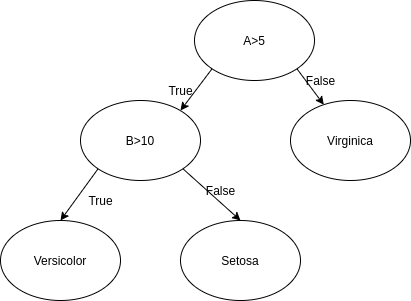
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [53]:
out = ""
def traversal(tree, spaces = ""):
        global out
        decision = list(tree.keys())[0]
        col_idx , op , val = decision.split()
        out += spaces + "Is " + col_idx + " " + op + " " + val + "?\n"
        out += spaces + "True branch" + "\n"
        left = tree[decision][0]
        if isinstance(left , dict):
            traversal(left   , (spaces + "  "))
        else:
            
            out += spaces + "  " + str(left) + "\n"
        out += spaces + "  " + "False branch\n"
        right = tree[decision][1]
        if isinstance(right , dict):
            traversal(right  , (spaces + "  "))
        else:
            
            out += spaces + "  " + str(right) + "\n"
            
traversal(tree_entropy, out)
#print(out)
with open('/content/drive/My Drive/SMAI/outputimp.txt', 'w') as writefile:
  writefile.write(out)

4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [122]:
high_corr_col_dt = []
for i in range(9):
  corr = np.corrcoef(data[:,-1], data[:,i])[0][1]
  if(corr >= 0.75 or corr <=-0.75):
    high_corr_col_dt.append(i)
    print(i,corr)

X_train_corr_dt = data[:,high_corr_col]
#print(X_train_corr_dt.shape)
x_train_corr = np.append(x_train, y_train.reshape((-1,1)), axis=1)
x_test_corr = np.append(x_test, y_test.reshape((-1,1)), axis=1)
#print(x_train_corr.shape , x_test_corr.shape )

tree_gini_corr = decision_tree_algorithm(x_train_corr, max_depth=5, split_criteria="gini")
tree_entropy_corr = decision_tree_algorithm(x_train_corr, max_depth=4, split_criteria="entropy")
tree_mis_err_corr = decision_tree_algorithm(x_train_corr, max_depth=8, split_criteria="misclassification error")
#pprint.pprint(tree_mis_err)
#pprint.pprint(tree_entropy)
#pprint.pprint(tree_gini)
gini_acc_corr = accuracy(x_test_corr, tree_gini_corr)
entr_acc_corr = accuracy(x_test_corr, tree_entropy_corr)
mis_err_acc_corr = accuracy(x_test_corr, tree_mis_err_corr)
table_corr = [["Entropy","Gini","Misclassification Error"]]
table_corr.append([entr_acc_corr, gini_acc_corr, mis_err_acc_corr ])
print(tabulate(table_corr))

1 0.817903735307562
2 0.8189337394205244
5 0.8176528563711154
6 0.7566161463789056
------------------  ------------------  -----------------------
Entropy             Gini                Misclassification Error
0.9619047619047619  0.9428571428571428  0.7428571428571429
------------------  ------------------  -----------------------


###Observation
Even on performing the algorithm on higher correlated features, results are almost similar.<br>
I calculated correlation between every feature and the class.<br>
Those feature which had high correlation with the label were selected for making the tree.

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer:<br>
**Advantages**<br>
1) Decision Tree are the most interpretable algorithm. We can actually visualize the structure of model very easily using an "IF_ELSE" diagram.<br>
2) Feature normalization and scaling does not has much impact on decision tree.<br>
**Dosadvantages**<br>
1) Constructing tree for large data is time consuming.<br>
2) Small changes on data can lead to a much different tree